Solution as provided by Capt Justin Merrick, CSCE 623, SP2019
with minor modifications by Dr. Borghetti, 7 May 2020

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as col

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

from IPython.display import Markdown as md


from adjustText import adjust_text
# if you dont have adjustText in your python distro, see adjustText installation instructions here:  https://github.com/Phlya/adjustText

# Steps 1, 2, and 3 - Load, explore, and discuss the datasets (1-3)
note that this step combines these actions for all 3 datasets

## Helper function for scatterplots

In [2]:
def class_scatter(data):
    """Plots scatterplot of data with X1 feature on x-axis, X2 feature on x-axis, color-coded to class
        - Params: data - dataset with 2 predictor variables and a class variable with 2 classes"""
    
    colors = ['red','blue']
    plt.scatter(data.X1, data.X2, c=data.Class, cmap=col.ListedColormap(colors))
    plt.xlabel('X1')
    plt.ylabel('X2')
    cb = plt.colorbar()
    cb.set_ticks([0.25,0.75])
    cb.set_ticklabels(['Class 0','Class 1'])
    plt.show();

## Helper function for data descriptions during exploration

In [3]:
def data_toplevel(data):
    class_scatter(data)
    display(md('Data Statistics:'))
    display(data.describe())
    display(md('Class 0 Statistics:'))
    display(data.loc[data.Class==0,:].describe())
    display(md('Class 1 Statistics:'))
    display(data.loc[data.Class==1,:].describe())
    display(md('Covariance of Class 0:'))
    display(data.loc[data.Class==0,['X1','X2']].cov())
    display(md('Covariance of Class 1:'))
    display(data.loc[data.Class==1,['X1','X2']].cov())
    sns.pairplot(data)
    data.loc[data.Class==0,:].hist(grid=False, layout=(1,3), figsize=(12,4));
    data.loc[data.Class==1,:].hist(grid=False, layout=(1,3), figsize=(12,4));

## Step 1 and 2:  Load and explore Dataset 1

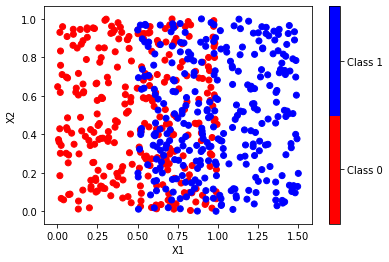

Data Statistics:

,X1,X2,Class
count,600.000000,600.000000,600.000000
mean,0.747401,0.494678,0.500000
std,0.380747,0.296411,0.500417
min,0.002703,0.000546,0.000000
25%,0.510941,0.244774,0.000000
50%,0.730347,0.466113,0.500000
75%,0.984056,0.754525,1.000000
max,1.499809,0.999278,1.000000


Class 0 Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,0.499781,0.496625,0.0
std,0.286360,0.300674,0.0
min,0.002703,0.004695,0.0
25%,0.253867,0.242792,0.0
50%,0.519936,0.457914,0.0
75%,0.724439,0.762296,0.0
max,0.994401,0.998847,0.0


Class 1 Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,0.995021,0.492732,1.0
std,0.292195,0.292575,0.0
min,0.500664,0.000546,1.0
25%,0.749720,0.246140,1.0
50%,0.975708,0.481389,1.0
75%,1.246680,0.747359,1.0
max,1.499809,0.999278,1.0


Covariance of Class 0:

,X1,X2
X1,0.082002,-0.001860
X2,-0.001860,0.090405


Covariance of Class 1:

,X1,X2
X1,0.085378,0.003886
X2,0.003886,0.085600


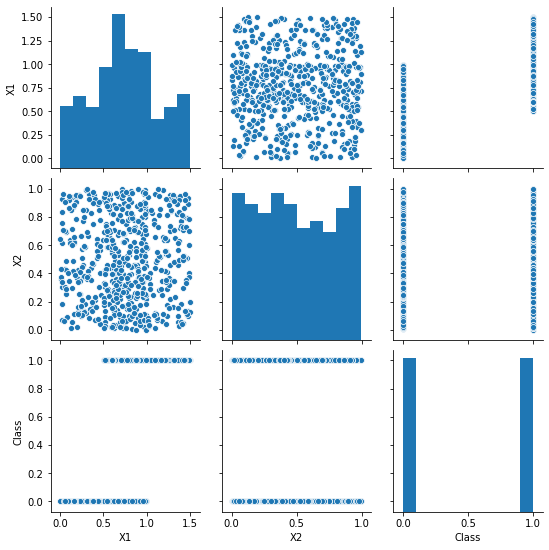

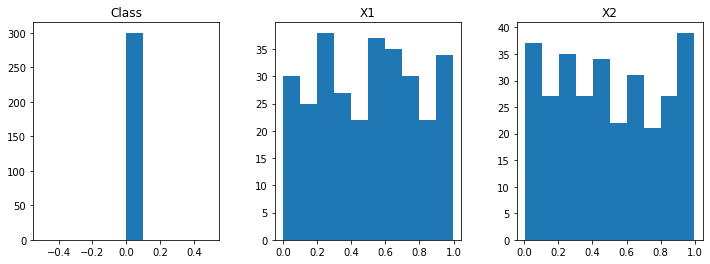

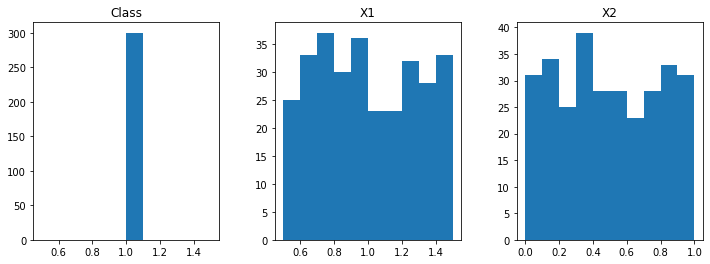

In [4]:
data1 = pd.read_csv('datset1.csv', header=0, names=['X1','X2','Class'], index_col=0)
data_toplevel(data1)


## Step 3: Dataset 1 Discussion

Dataset 1 is investigated in the above figures and graphs. There are 600 total observations, 300 to a class. The histograms and the Data Statistics table show us that there are indeed only 2 classes in the dataset and that there are no data not labeled as either 0 or 1. It also shows us that X1 is distributed with a mean at 0.75, a range of 0.003 to 1.500, and a standard deviation of 0.381. X1 loosely resembles a normal distribution, but its very heavy tails make it resembe a t distribution more closely, though even that might not account for its tail-heavy distribution. When we consider the class-specific distributions of X1, this distribution flattens into one that is approximately uniform. X2 is distributed nearly uniformly, with a mean at 0.495, a range of 0.001 to 0.999 and a standard deviation of 0.296. This distribution is maintained when examining the class-specific distributions of X2. The first plot is a scatterplot showing X1 on the x-axis, X2 on the y-axis, with the classes color-coded. We see a definite clustering of the classes with respect to X1, with a rough decision boundary of around X1=0.75, and a lack of clustering of the classes with respect to X2. This may be a first indicator that X2 is of no use in predicting the class of an observation. This data is supported by the statistics tables for each class, which show X1 means at 0.5 and 1.0 for Class 0 and Class 1 respectively. The means for X2 remain the same at approximately 0.5. The standard deviation per class and feature is relatively constant, varying slightly around 0.29. The covariance tables of each of the classes are relatively equal, which indicates we may be able to use LDA as a model, but the uniform distribution of the data may cause LDA to fail, but the sign switch from Class 0 to Class 1 on the off-diagonal terms may be enough to give LDA poorer performance than QDA, where the classes can have separate covariance matrices. Logistic regression is likely the best suited to this dataset due to the lack of normality in the distribution of the observations.

## Step 1 and 2:  Load and Explore Dataset 2

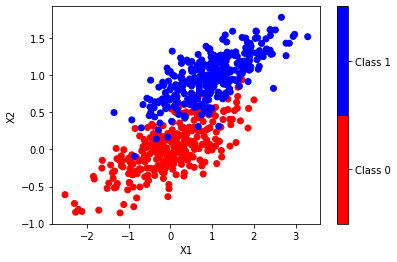

Data Statistics:

,X1,X2,Class
count,600.000000,600.000000,600.000000
mean,0.473725,0.495420,0.500000
std,0.951497,0.576779,0.500417
min,-2.528299,-0.856548,0.000000
25%,-0.152288,0.018048,0.000000
50%,0.460075,0.515972,0.500000
75%,1.121963,0.973737,1.000000
max,3.290265,1.786571,1.000000


Class 0 Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,-0.020282,0.014036,0.0
std,0.827376,0.326269,0.0
min,-2.528299,-0.856548,0.0
25%,-0.548454,-0.183206,0.0
50%,0.015693,0.018753,0.0
75%,0.507965,0.200593,0.0
max,2.002337,0.941891,0.0


Class 1 Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,0.967732,0.976804,1.0
std,0.799657,0.308217,0.0
min,-1.352680,-0.090780,1.0
25%,0.407415,0.765874,1.0
50%,0.952037,0.974333,1.0
75%,1.436953,1.193200,1.0
max,3.290265,1.786571,1.0


Covariance of Class 0:

,X1,X2
X1,0.684551,0.189066
X2,0.189066,0.106452


Covariance of Class 1:

,X1,X2
X1,0.639451,0.175940
X2,0.175940,0.094998


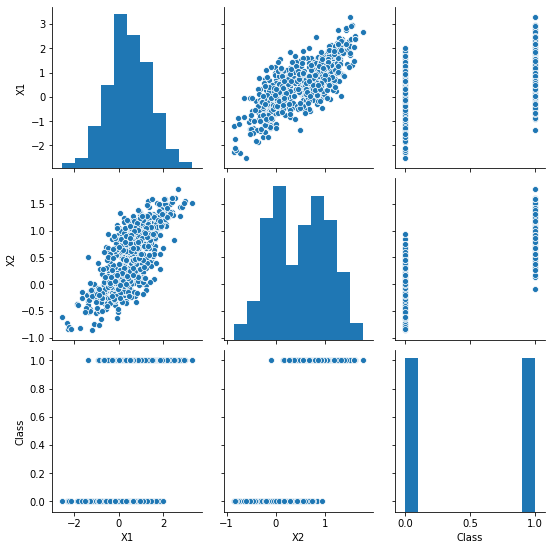

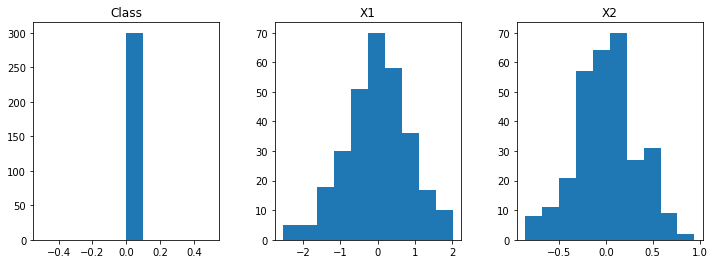

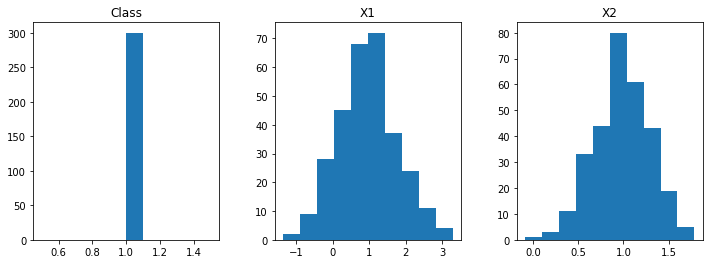

In [5]:
data2 = pd.read_csv('datset2.csv', header=0, names=['X1','X2','Class'], index_col=0)
data_toplevel(data2)

## Step 3: Dataset 2 Discussion

Dataset 2 has significantly different characteristics than Dataset 1. This is most obvious from the scatterplot above. In it we can see that both X1 and X2 most likely have an impact on the determination of Class. Furthermore, the distribution of each predictor appears normal. This is backed up by the class-specific histograms for the predictor variables. X1 appears normally distributed overall, but the class-specific distributions reveal that the observations for each class are approximately normally distributed in X1, with means at approximately 0 and 1 and standard deviations of around 0.83 and 0.80 respectively for Class 0 and Class 1. The overall distribution of X2 appears bimodal and when broken down by class we see that this was the case, with Class 0 having a normal distribution with mean of 0.01 and standard deviation of 0.33 and Class 0 having a normal distribution with mean of 0.98 and standard deviation of 0.31. The similarity of these variances makes it likely that the predictors share a common covariance matrix across classes. This is supported by the very similar covariance matrices of Class 0 and Class 1. This similarity supports the use of LDA over QDA as a modeling technique. The correlation plot shows strong multicollinearity between X1 and X2, which would support the use of LDA or QDA over logistic regression. Therefore it is likely that LDA will be the best performing modeling technique for this data.

## Step 1 and 2: Load and Explore Dataset 3

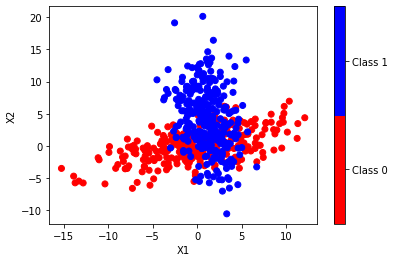

Data Statistics:

,X1,X2,Class
count,600.000000,600.000000,600.000000
mean,0.477786,2.196081,0.500000
std,3.822859,4.382142,0.500417
min,-15.230715,-10.529514,0.000000
25%,-1.234267,-0.722251,0.000000
50%,0.802649,1.376222,0.500000
75%,2.632443,4.799941,1.000000
max,12.062268,20.120173,1.000000


Class 0 Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,-0.122183,0.136718,0.0
std,4.984191,2.455616,0.0
min,-15.230715,-6.575621,0.0
25%,-3.303942,-1.457636,0.0
50%,0.094533,0.121755,0.0
75%,3.060031,1.661628,0.0
max,12.062268,6.951659,0.0


Class 1 Statistics:

,X1,X2,Class
count,300.000000,300.000000,300.0
mean,1.077754,4.255444,1.0
std,1.926884,4.891850,0.0
min,-4.518710,-10.529514,1.0
25%,-0.052898,0.867808,1.0
50%,1.115572,4.123293,1.0
75%,2.427915,7.586508,1.0
max,6.669109,20.120173,1.0


Covariance of Class 0:

,X1,X2
X1,24.842163,6.922880
X2,6.922880,6.030051


Covariance of Class 1:

,X1,X2
X1,3.712883,-2.664862
X2,-2.664862,23.930196


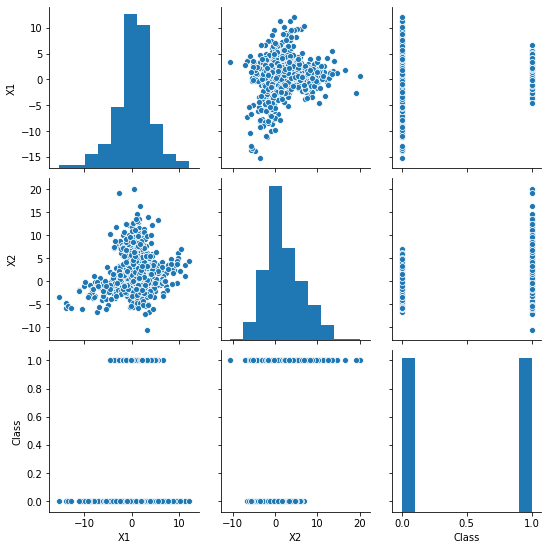

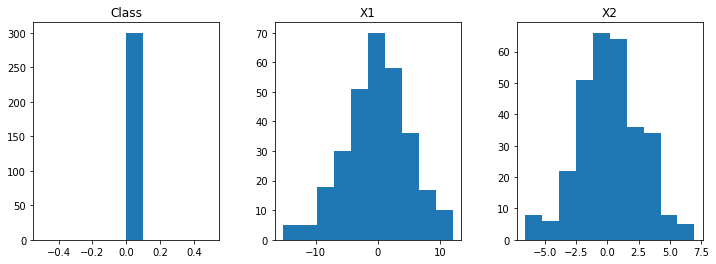

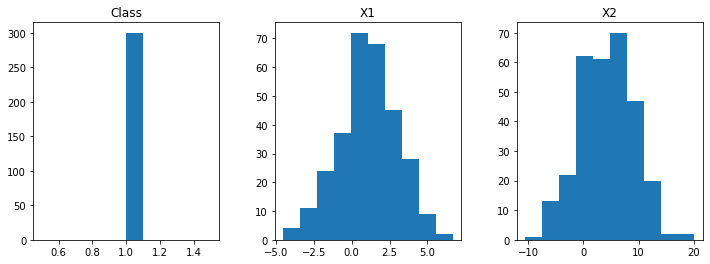

In [6]:
data3 = pd.read_csv('datset3.csv', header=0, names=['X1','X2','Class'], index_col=0)
data_toplevel(data3)

## Step 3: Dataset 3 Discussion 

Dataset 3 is similar to Dataset 2 in the forms of the distributions of the data. Both X1 and X2 show approximately normal distributions when the whole dataset is looked at and when it is broken down by class. The parameters of the Class 0 distributions are (-0.12, 4.98) for X1 and (0.14, 2.46) for X2. The scatterplot reveals important information about this data. First, the spread of the data is much greater than that of Dataset 1 or Dataset 2, with X1 on the interval [-15.23, 12.06] and X2 on the interval [-10.53, 20.12]. Second, there is little to no multicollinearity in the data, with the direction of the primary spread of the data nearly orthogonal to one another. This drastically more variant data than previously encountered results in Class covariance matrices that are substantially different from one another. This would make LDA a poor modeling technique in this case, instead QDA should be favored due to its flexibility in using separate covariance matrices per class. QDA will likely perform better than logistic regression on this dataset because the assumption of normality that QDA makes is valid, potentially granting its predictive capabilities superior accuracy.

# Step 4:  Make function for Test/Training Split 

In [7]:
def test_split(data, split):
    """Function to take a full data set and return a test and training data set with approximately
    equal numbers of each class in both the training and test sets
        - Params: data - data to split
                  split - proportion of data in test set, range[0,1]
    """
    classes = data.Class.unique()
    class_test = []
    class_train = []
    for i, cls in enumerate(classes):
        class_data = data.loc[data.Class==cls,:]
        class_test.append(class_data.sample(frac=split))
        class_train.append(class_data.drop(class_test[i].index))
    test_set = pd.concat(class_test)
    train_set = pd.concat(class_train)
    return test_set, train_set


In [8]:
test1, train1 = test_split(data1, 0.5)
test2, train2 = test_split(data2, 0.5)
test3, train3 = test_split(data3, 0.5)

# Step 5: Fitting Classifiers

In [9]:
def build_classifiers(data):
    X = data.loc[:,['X1', 'X2']]
    y = data.Class
    log_reg = LogisticRegression(solver='lbfgs')
    log_reg.fit(X, y)
    
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X, y)
    
    return {'log':log_reg, 'lda':lda, 'qda':qda}

In [10]:
models1 = build_classifiers(train1)
models2 = build_classifiers(train2)
models3 = build_classifiers(train3)

# Step 6: Use the model to estimate class probabilities on the test set

In [11]:
def predict_probs(models, X):
    predicts = {}
    for key, model in models.items():
        predicts[key] = model.predict_proba(X)
    return predicts

In [12]:
predicts1 = predict_probs(models1, test1.loc[:,['X1','X2']])
predicts2 = predict_probs(models2, test2.loc[:,['X1','X2']])
predicts3 = predict_probs(models3, test3.loc[:,['X1','X2']])

In [13]:
#to see the probabilities displayed, uncomment the line below
# predicts1["lda"] 

# Step 7:  Build a function to return ROC data

In [14]:
def getROCdata(truthVals, probs, thresholds):
#     table = {'Threshold':[], 'True Positive':[], 'False Positive':[], 'True Negative':[],'False Negative':[], 
#              'True Positive Rate':[], 'False Positive Rate':[], 'Accuracy':[], 'Precision':[], 'F-measure':[]}
    columns = ['Threshold', 'True Positive', 'False Positive', 'True Negative','False Negative', 
             'True Positive Rate', 'False Positive Rate', 'Accuracy', 'Precision', 'F-measure']
    table = {col:[] for col in columns}
    for val in thresholds:
        table["Threshold"].append(val)
        pred_pos = probs[:,1] >= val
        
        true_pos = (pred_pos & truthVals).sum()
        table["True Positive"].append(true_pos)
        
        false_pos = (pred_pos[~truthVals]).sum()
        table["False Positive"].append(false_pos)
        
        true_neg = ((~pred_pos) & (~truthVals)).sum()
        table["True Negative"].append(true_neg)
        
        false_neg = (pred_pos[truthVals]==False).sum()
        table["False Negative"].append(false_neg)
        
        true_rate = true_pos/(false_neg + true_pos)
        table["True Positive Rate"].append(true_rate)
        
        table["False Positive Rate"].append(false_pos/(false_pos + true_neg))
        
        table["Accuracy"].append((true_pos+true_neg)/pred_pos.shape[0])
        
        prec = true_pos/(false_pos+true_pos)
        table["Precision"].append(prec)
        
        table["F-measure"].append(2*(prec*true_rate)/(prec+true_rate))
        
    return pd.DataFrame.from_dict(table)[columns]
        

Note: The block below was used to verify the ROC data calculation methods for each of the values on a small and easily visualized data set.

In [15]:

preds = np.random.random(10)>=0.5
truths = np.random.random(10)>=0.5

print('preds: ', preds)
print('truths: ', truths)
true_pos = (preds & truths).sum()
print('true pos:', true_pos)
false_pos = preds[~truths].sum()
print('false pos:', false_pos)
true_neg = (~preds & ~truths).sum()
print('true neg:', true_neg)
false_neg = (preds[truths]==False).sum()
print('false neg:', false_neg)
print('false pos rate: ', false_pos/(true_neg+false_pos))
print('true pos rate: ', true_pos/(false_neg+true_pos))



preds:  [False  True False False  True False False False False False]
truths:  [ True False  True  True  True False False  True False  True]
true pos: 1
false pos: 1
true neg: 3
false neg: 5
false pos rate:  0.25
true pos rate:  0.16666666666666666


# Step 8: Generate ROC Data

In [16]:
def thresh_range(predict):
    thresholds = {}
    for method, probs in predict.items():
        thresh_min = np.ceil(probs[:,1].min()*100.)/100.
        thresh_max = np.floor(probs[:,1].max()*100.)/100.
        thresholds[method] = np.linspace(thresh_min, thresh_max, 100)
    return thresholds

In [17]:
def ROC_wrapper(test_set, predicts, thresholds):
    ROC_table = {}
    for method, probs in predicts.items():
        ROC_table[method] = getROCdata(test_set.Class.astype(bool), probs, thresholds[method])
    return ROC_table
        

In [18]:
thresholds1 = thresh_range(predicts1)
thresholds2 = thresh_range(predicts2)
thresholds3 = thresh_range(predicts3)

ROC_table1 = ROC_wrapper(test1, predicts1, thresholds1)
ROC_table2 = ROC_wrapper(test2, predicts2, thresholds2)
ROC_table3 = ROC_wrapper(test3, predicts3, thresholds3)

Note - ROC plots shown in Step 11 with annotations included.

# Step 9:  Compute and report ROC AUC

In [19]:
def area_under_roc(tables):
    area={}
    for method, table in tables.items():
        tpr = table["True Positive Rate"]
        fpr = table["False Positive Rate"]
        area[method] = (0.5*(tpr.iloc[1:]+tpr.iloc[0:-1])*fpr.diff().abs().iloc[1:]).sum()+(1.-fpr.iloc[0]) # not working quite right yet
    return area

AUC was calculated using a trapezoidal approximation, it was assumed (correctly) that all ROC curves had a threshold that resulted in a zero false positive rate. It was also assumed that the data was sorted such that the false positive rate is high at the beginning of the table. The trapezoidal method is a somewhat coarse approximation, so the sklearn function was used as a baseline and the errors of the trapezoidal method were calculated. In those errors, shown below, we see that the trapezoidal method is good to about two decimal places before errors start appearing.

In [20]:
area1 = area_under_roc(ROC_table1)
area2 = area_under_roc(ROC_table2)
area3 = area_under_roc(ROC_table3)
print('AUC, dataset1:',area1)
print('AUC, dataset2:',area2)
print('AUC, dataset3:',area3)

AUC, dataset1: {'log': 0.8664888888888889, 'lda': 0.8669777777777778, 'qda': 0.8676444444444444}
AUC, dataset2: {'log': 0.9904444444444443, 'lda': 0.9892444444444444, 'qda': 0.9887111111111112}
AUC, dataset3: {'log': 0.7734666666666666, 'lda': 0.7752444444444445, 'qda': 0.8983111111111111}


In [21]:
def auc_wrapper(test_set, predicts):
    auc={}
    for method, probs in predicts.items():
        auc[method] = roc_auc_score(test_set.Class, probs[:,1])
    return auc


For completeness, errors between the trap approximation method and actual AUC are shown below

In [22]:
auc1 = auc_wrapper(test1, predicts1)
auc2 = auc_wrapper(test2, predicts2)
auc3 = auc_wrapper(test3, predicts3)
print('Trapezoidal method error, dataset1:',{key:np.abs((area1[key]-auc1[key])) for key in area1})
print('Trapezoidal method error, dataset2:',{key:np.abs((area2[key]-auc2[key])) for key in area2})
print('Trapezoidal method error, dataset3:',{key:np.abs((area3[key]-auc3[key])) for key in area3})

Trapezoidal method error, dataset1: {'log': 0.003155555555555578, 'lda': 0.002577777777777679, 'qda': 0.0021333333333333204}
Trapezoidal method error, dataset2: {'log': 0.00035555555555577545, 'lda': 0.00013333333333331865, 'qda': 0.0005777777777776771}
Trapezoidal method error, dataset3: {'log': 0.004622222222222194, 'lda': 0.003911111111110976, 'qda': 0.002755555555555511}


# Step 10:  Show Confusion matrices where Accuracy, Precision, Recall, and F-Measure are maximize

In [23]:
def get_confusion_table(tables):
    columns = {"Accuracy", "Precision", "True Positive Rate", "F-measure"}
    max_thresh = {}
    for method, table in tables.items():
        thresh_dict = {col:table.loc[table[col].idxmax(),:] for col in columns}
        max_thresh[method] = pd.DataFrame.from_dict(thresh_dict, orient='index')
    return max_thresh
        
        

In [24]:
confusions1 = get_confusion_table(ROC_table1)
confusions2 = get_confusion_table(ROC_table2)
confusions3 = get_confusion_table(ROC_table3)

In [25]:
confusions1["log"]

,Threshold,True Positive,False Positive,True Negative,False Negative,True Positive Rate,False Positive Rate,Accuracy,Precision,F-measure
Precision,0.746263,67.0,0.0,150.0,83.0,0.446667,0.000000,0.723333,1.000000,0.617512
F-measure,0.225859,150.0,76.0,74.0,0.0,1.000000,0.506667,0.746667,0.663717,0.797872
True Positive Rate,0.040000,150.0,142.0,8.0,0.0,1.000000,0.946667,0.526667,0.513699,0.678733
Accuracy,0.448889,120.0,39.0,111.0,30.0,0.800000,0.260000,0.770000,0.754717,0.776699


In [26]:
def print_confusion_table(tables):
    for method, table in tables.items():
        display(md('Model: %s' %method.upper()))
        for measure in table.index:
            display(md('Threshold for maximum %s: %f' %(measure, table.loc[measure, "Threshold"])))
            true_neg = table.loc[measure, "True Negative"]
            false_pos = table.loc[measure, "False Positive"]
            false_neg = table.loc[measure, "False Negative"]
            true_pos = table.loc[measure, "True Positive"]
            confusion_table = pd.DataFrame([[true_neg, false_pos, true_neg+false_pos],
                                           [false_neg, true_pos, false_neg+true_pos],
                                           [true_neg+false_neg, false_pos+true_pos]], 
                                           columns=['Predicted 0', 'Predicted 1', 'Total'],
                                          index = ['True 0', 'True 1', 'Total'])
            display(confusion_table)

In [27]:
print_confusion_table(confusions1)

Model: LOG

Threshold for maximum Precision: 0.746263

,Predicted 0,Predicted 1,Total
True 0,150.0,0.0,150.0
True 1,83.0,67.0,150.0
Total,233.0,67.0,NaN


Threshold for maximum F-measure: 0.225859

,Predicted 0,Predicted 1,Total
True 0,74.0,76.0,150.0
True 1,0.0,150.0,150.0
Total,74.0,226.0,NaN


Threshold for maximum True Positive Rate: 0.040000

,Predicted 0,Predicted 1,Total
True 0,8.0,142.0,150.0
True 1,0.0,150.0,150.0
Total,8.0,292.0,NaN


Threshold for maximum Accuracy: 0.448889

,Predicted 0,Predicted 1,Total
True 0,111.0,39.0,150.0
True 1,30.0,120.0,150.0
Total,141.0,159.0,NaN


Model: LDA

Threshold for maximum Precision: 0.815152

,Predicted 0,Predicted 1,Total
True 0,150.0,0.0,150.0
True 1,84.0,66.0,150.0
Total,234.0,66.0,NaN


Threshold for maximum F-measure: 0.175152

,Predicted 0,Predicted 1,Total
True 0,76.0,74.0,150.0
True 1,1.0,149.0,150.0
Total,77.0,223.0,NaN


Threshold for maximum True Positive Rate: 0.020000

,Predicted 0,Predicted 1,Total
True 0,17.0,133.0,150.0
True 1,0.0,150.0,150.0
Total,17.0,283.0,NaN


Threshold for maximum Accuracy: 0.417576

,Predicted 0,Predicted 1,Total
True 0,110.0,40.0,150.0
True 1,28.0,122.0,150.0
Total,138.0,162.0,NaN


Model: QDA

Threshold for maximum Precision: 0.821717

,Predicted 0,Predicted 1,Total
True 0,150.0,0.0,150.0
True 1,82.0,68.0,150.0
Total,232.0,68.0,NaN


Threshold for maximum F-measure: 0.148586

,Predicted 0,Predicted 1,Total
True 0,74.0,76.0,150.0
True 1,1.0,149.0,150.0
Total,75.0,225.0,NaN


Threshold for maximum True Positive Rate: 0.010000

,Predicted 0,Predicted 1,Total
True 0,1.0,149.0,150.0
True 1,0.0,150.0,150.0
Total,1.0,299.0,NaN


Threshold for maximum Accuracy: 0.435657

,Predicted 0,Predicted 1,Total
True 0,113.0,37.0,150.0
True 1,31.0,119.0,150.0
Total,144.0,156.0,NaN


In [28]:
print_confusion_table(confusions2)

Model: LOG

Threshold for maximum Precision: 0.811818

,Predicted 0,Predicted 1,Total
True 0,150.0,0.0,150.0
True 1,37.0,113.0,150.0
Total,187.0,113.0,NaN


Threshold for maximum F-measure: 0.534646

,Predicted 0,Predicted 1,Total
True 0,147.0,3.0,150.0
True 1,9.0,141.0,150.0
Total,156.0,144.0,NaN


Threshold for maximum True Positive Rate: 0.010000

,Predicted 0,Predicted 1,Total
True 0,12.0,138.0,150.0
True 1,0.0,150.0,150.0
Total,12.0,288.0,NaN


Threshold for maximum Accuracy: 0.534646

,Predicted 0,Predicted 1,Total
True 0,147.0,3.0,150.0
True 1,9.0,141.0,150.0
Total,156.0,144.0,NaN


Model: LDA

Threshold for maximum Precision: 0.970202

,Predicted 0,Predicted 1,Total
True 0,150.0,0.0,150.0
True 1,40.0,110.0,150.0
Total,190.0,110.0,NaN


Threshold for maximum F-measure: 0.534646

,Predicted 0,Predicted 1,Total
True 0,144.0,6.0,150.0
True 1,9.0,141.0,150.0
Total,153.0,147.0,NaN


Threshold for maximum True Positive Rate: 0.010000

,Predicted 0,Predicted 1,Total
True 0,85.0,65.0,150.0
True 1,0.0,150.0,150.0
Total,85.0,215.0,NaN


Threshold for maximum Accuracy: 0.534646

,Predicted 0,Predicted 1,Total
True 0,144.0,6.0,150.0
True 1,9.0,141.0,150.0
Total,153.0,147.0,NaN


Model: QDA

Threshold for maximum Precision: 0.970202

,Predicted 0,Predicted 1,Total
True 0,150.0,0.0,150.0
True 1,42.0,108.0,150.0
Total,192.0,108.0,NaN


Threshold for maximum F-measure: 0.514848

,Predicted 0,Predicted 1,Total
True 0,144.0,6.0,150.0
True 1,9.0,141.0,150.0
Total,153.0,147.0,NaN


Threshold for maximum True Positive Rate: 0.010000

,Predicted 0,Predicted 1,Total
True 0,90.0,60.0,150.0
True 1,0.0,150.0,150.0
Total,90.0,210.0,NaN


Threshold for maximum Accuracy: 0.514848

,Predicted 0,Predicted 1,Total
True 0,144.0,6.0,150.0
True 1,9.0,141.0,150.0
Total,153.0,147.0,NaN


In [29]:
print_confusion_table(confusions3)

Model: LOG

Threshold for maximum Precision: 0.822727

,Predicted 0,Predicted 1,Total
True 0,150.0,0.0,150.0
True 1,114.0,36.0,150.0
Total,264.0,36.0,NaN


Threshold for maximum F-measure: 0.404545

,Predicted 0,Predicted 1,Total
True 0,101.0,49.0,150.0
True 1,35.0,115.0,150.0
Total,136.0,164.0,NaN


Threshold for maximum True Positive Rate: 0.070000

,Predicted 0,Predicted 1,Total
True 0,1.0,149.0,150.0
True 1,1.0,149.0,150.0
Total,2.0,298.0,NaN


Threshold for maximum Accuracy: 0.478889

,Predicted 0,Predicted 1,Total
True 0,120.0,30.0,150.0
True 1,48.0,102.0,150.0
Total,168.0,132.0,NaN


Model: LDA

Threshold for maximum Precision: 0.814545

,Predicted 0,Predicted 1,Total
True 0,150.0,0.0,150.0
True 1,118.0,32.0,150.0
Total,268.0,32.0,NaN


Threshold for maximum F-measure: 0.446869

,Predicted 0,Predicted 1,Total
True 0,116.0,34.0,150.0
True 1,44.0,106.0,150.0
Total,160.0,140.0,NaN


Threshold for maximum True Positive Rate: 0.070000

,Predicted 0,Predicted 1,Total
True 0,1.0,149.0,150.0
True 1,0.0,150.0,150.0
Total,1.0,299.0,NaN


Threshold for maximum Accuracy: 0.446869

,Predicted 0,Predicted 1,Total
True 0,116.0,34.0,150.0
True 1,44.0,106.0,150.0
Total,160.0,140.0,NaN


Model: QDA

Threshold for maximum Precision: 0.920000

,Predicted 0,Predicted 1,Total
True 0,150.0,0.0,150.0
True 1,76.0,74.0,150.0
Total,226.0,74.0,NaN


Threshold for maximum F-measure: 0.340000

,Predicted 0,Predicted 1,Total
True 0,96.0,54.0,150.0
True 1,11.0,139.0,150.0
Total,107.0,193.0,NaN


Threshold for maximum True Positive Rate: 0.010000

,Predicted 0,Predicted 1,Total
True 0,42.0,108.0,150.0
True 1,0.0,150.0,150.0
Total,42.0,258.0,NaN


Threshold for maximum Accuracy: 0.550000

,Predicted 0,Predicted 1,Total
True 0,136.0,14.0,150.0
True 1,46.0,104.0,150.0
Total,182.0,118.0,NaN


# Step 11: Plot ROC and Add annotations to the ROC graph 
(note the outputs are not shown until step 12

In [30]:
def plot_ROC(table, method):
    colors = {"log":"red", "lda":"blue", "qda":"green"}
    plt.plot(table["False Positive Rate"], table["True Positive Rate"], label=method, color=colors[method])
    plt.plot(np.arange(-1,3),np.arange(-1,3),':k', alpha=0.2)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.legend(loc=4)

In [31]:
def annotated_ROCs(rocs, confusions, dataset_num):
    texts = []
    x=[]
    y=[]
    arrowprops = dict(arrowstyle = "->")#, connectionstyle="angle")
    plt.figure(figsize=(8,6))
    plt.title('Dataset %i' %dataset_num)
    for method, confusion in confusions.items():
        plot_ROC(rocs[method], method)
        for measure in confusion.index:
            texts.append(plt.text(confusion.loc[measure, "False Positive Rate"],
                                   confusion.loc[measure, "True Positive Rate"], 
                                   method.upper()+" "+measure))
#             plt.annotate((method.upper()+" max "+measure),
#                          (confusion.loc[measure, "False Positive Rate"],confusion.loc[measure, "True Positive Rate"]),
#                         xytext=(confusion.loc[measure, "False Positive Rate"], confusion.loc[measure, "False Positive Rate"]),
#                         arrowprops=arrowprops)
        x = [*x, *rocs[method].loc[:,"False Positive Rate"].values]
        y = [*y, *rocs[method].loc[:, "True Positive Rate"].values]
    adjust_text(texts, x, y, lim=2000, autoalign=False, va='top', ha='center', precision=0.000001, force_text=(0.2,0.5),arrowprops=arrowprops)
    plt.show();

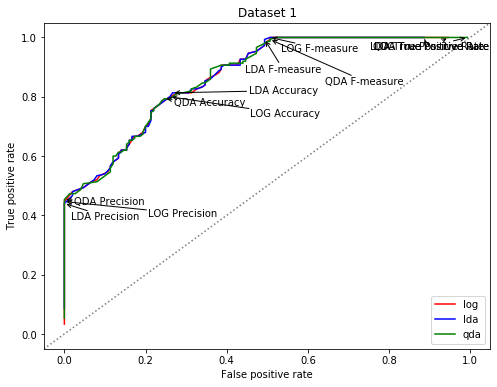

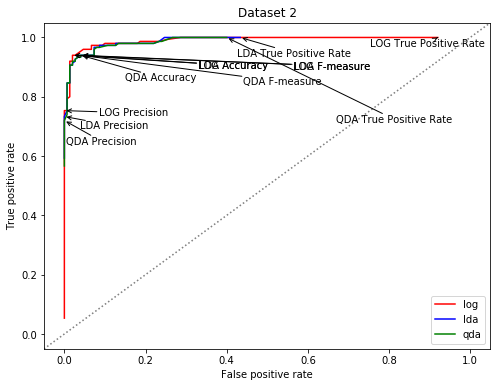

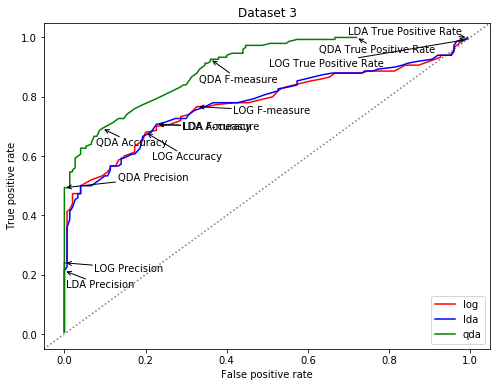

In [32]:
annotated_ROCs(ROC_table1, confusions1, 1)
annotated_ROCs(ROC_table2, confusions2, 2)
annotated_ROCs(ROC_table3, confusions3, 3)

For all datasets and all methods, the threshold for maximum precision is located at the maximum true positive rate point with a false positive rate of zero. This makes sense as by maintaining a zero false positive rate, the equation for precision becomes true positive count divided by true positive count yielding one. Similarly, the threshold for maximum recall, or true positive rate, occurs where the true positive rate is equal to one, which is caused by driving the false negative count to zero, this is naturally the highest plotted threshold value. Accuracy and F-measure more reliably measure the tradeoff in performance between false and true positive rates. The theshold values for maximizing these performance measures lie along the elbow in the ROC curve, where it transitions between vertical and horizontal. In the datasets graphed here, Accuracy is maximized at a lower false positive rate, corresponding to a lower true positive rate, while F-measure is maximized at a slightly higher false positive and true positive rate. This makes sense as a higher threshold will likely result in fewer true negatives and more false positives, boosting the value of the F-measure. Conversely, a lower threshold will cause a lower false positive rate, which will likely result in more true negatives, boosting the value of Accuracy.

# Step 12:  Answer Customer Questions
a.	For each dataset, describe which model you recommend the school use for their decision-making (and why).  
b.	Indicate which probability threshold value (or values) you would recommend they set the classifier to use if they wanted to balance the risk of false positives and false negatives.  


For dataset 1 I would recommend the use of logistic regression. While the ROC curves for all three methods were very similar for this dataset, as is the AUC, any choice of method may seem appropriate. However, the uniform distribution of the data technically violates the normality assumption of LDA and QDA, so there are better theoretical grounds for using logistic regression. I recommend a threshold value of 0.464, which is the threshold value for maximum accuracy, which will minimize the number of false positives and false negatives.

For dataset 2 I would recommend the use of LDA. Again the ROC curves and the AUC show that all three methods have very similar performance, but the nature of the dataset, with its normal distribution and common covariance across classes, makes it well suited to analysis by LDA on a theoretical basis as well as the practical result. A threshold of 0.317 should be used to maximize the accuracy.

For dataset 3 I recommend the use of QDA because the nature of the dataset suggests a normal distribution and separate class covariance matrices. This initial intuition played out in the ROC curves and AUC calculations, where QDA had a distinct advantage in the accurate classification of points. A threshold value of 0.48 will maximize the accuracy.